# DS6040: Homework 1: Probability Review and Priors

## Diana McSpadden (hdm5s)

## Q1 (15 points):
You are a data science and are choosing between three approaches,
A, B, and C, to a problem. 

* With approach A you will spend a total of four days coding and running an algorithm and it will not produce useful results. 

* With approach B you will spend a total of three days coding and running an algorithm and it will not produce useful results. 

* With approach C you will spend one day coding and running an algorithm and it will give the results you are looking for. 

You are equally likely to choose among unselected options. 

What is the expected time in days for you to obtain the results you are looking for? What is the variance on this time?

#### Answer:
* P(A->C,5 days) = 0.333 * 0.5 = 0.1665
* P(A->B->C,8 days) = 0.333 * 0.5 = 0.1665
* P(B->A->C,8 days) = 0.333 * 0.5 = 0.1665
* P(B->C,4 days) = 0.333 * 0.5 = 0.1665
* P(C,1 day) = 0.333


In [47]:
# confirm these sum to one
(0.1665 * 4) + 0.333

0.9990000000000001

In [48]:
print("Expected Days: {:1.2f} days".format((5 * 0.333 * 0.5) + (8 * 0.333 * 0.5) + (8 * 0.333 * 0.5) + (4 * 0.333 * 0.5) + (1 * 0.333)))

Expected Days: 4.50 days


In [65]:
mean_expecteddays = (5 + 8 + 8 + 4 + 1) / 5
#print(mean_expecteddays)
var_numerator = 0
lst_days = [5,8,8,4,1]
#print(np.mean(lst_days))
for d in lst_days:
    var_numerator += np.square(d - mean_expecteddays)

#print(var_numerator)

var_denominator = 4
#
variance = var_numerator / var_denominator
print("Variance: {:1.2f}".format(variance))

Variance: 8.70


## Q2 (15 points) 
Suppose if it is sunny or not in Charlottesville depends on the weather
of the last three days. Show how this can be modeled as a Markov chain

#### Answer:
from what I read the Marchov Property says that "only the most recent point in the trajectory affects what happens next" (<https://www.stat.auckland.ac.nz/~fewster/325/notes/ch8.pdf>)

We can create a transition matrix for Sunny Today To Sunny Tomorrow - where I am stating that there is an 80% probability it is sunny tomorrow if it is sunny today, and a 60% chance it if sunny tomorrow if it is not sunny today.

|       | **Sunny Tomorrow**     | **Not Sunny Tomorrow**     |
| :------------- | :----------: | -----------: |
|  **Sunny Today** | 0.8  | 0.2   |
| **Not Sunny Today** | 0.6 | 0.4 |


But this question asks for a 3-step transition ...

So, what is the probability of any of the 16 possible sequences of Sunny or Not Sunny for 4 days?


**P(Sunny Today | Sunny-day-1, Sunny-day-2, Sunny-day-3) means we need to calculate: **P(Sunny Day 4 | Sunny Day 1) and P(Sunny Day 4 | Not Sunny Day 1)**

So, we need to run through Day 1 - Day 2, Then Day 2 to Day 3, Then Day 3 to TODAY (Day Four).

According to <https://www.stat.auckland.ac.nz/~fewster/325/notes/ch8.pdf>, the general case for t-step transitions is that the probability for step t, is the probability taken to the t power, so, in my small example, the probability of it being sunny on day 4, if it was sunny today is 0.8^4 == 0.4096.

Here are my drawings of single step and the continual cycles from each state to itself and the other state for four steps:

![alt text](MCDiagram.jpg "Marchov Chain: Rainy Sunny")

## Question 3 (15 points) 
Assume a Gaussian distribution for observations, Xi, i = 1, . . . , N
with unknown mean, M, and known variance 5. 

Suppose the prior for M
is Gaussian with variance 10. 

How large a random sample must be taken
(i.e., what is the minimum value for N) to specify an interval having unit
length of 1 such that the probability that M lies in this interval is 0.95?

#### Answer:

* Use 1.96 for 95% CI sigma
* we have a Gaussian distribution (likelihood)
    * unknown M, known variance
        * var = 5
        * prior variance = 10
    * M is the same for prior and posterior

What is minimum value of N?


** Work**:

Using Bayes Theorem, the posterior variance is the Likelihood * Prior / Evidence =

sigma-prior^2 * sigma^2 / (sigma^2 + (N * sigma-prior^2)) = 

(10^2 * 5^2) / (25 + (100 * N)) = 

2500 / 25 + 100N


Because we are using a normal/Gaussian distribution our 95% condidence range is [-1.96 * sigma, 1.96 * sigma]

But we want this range to be unit length 1, so we need 1.96 * sigma to be 0.5

sigma = square root(2500 / (25 + 100N))

sigma needs to equal 0.5 / 1.96

solving for N:

In [76]:
N = (2500 - (0.065 * 25)) / 6.5
N

384.36538461538464

**N = 385 random samples**

#### Question 4 (15 points) 
You have started an online business selling books that are of interest
to your customers. A publisher has just given you a large book with
photos from famous 20th century photographers. You think this book
will appeal to people who have bought art books, history books and coffee
table books. In an initial offering of the new book you collect data on
purchases of the new book and combine these data with data from the
past purchases (see ArtHistBooks.csv).

Use Bayesian analysis to give the posterior probabilities for purchases of
art books, history books and coffee table books, as well as, the separate
probabilities for purchases of the new book given each possible combination of prior purchases of art books, history books and coffee table books.

Do this by first using beta priors with values of the hyperparameters that
represent lack of prior information. 

Then compute these probabilities
again with beta priors that show strong weighting for low likelihood of a
book purchase. Compare your results.

#### Answer:

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import binom
from scipy.stats import beta

In [164]:
def posterior_from_conjugate_prior(**kwargs):
    if kwargs['Likelihood_Dist_Type'] == 'Binomial':
        # Get the parameters for the likelihood and prior distribution from the key word arguments.
        x = kwargs['x'] # This is state space of possible values for p = 'probability of success' in [0,1]
        n = kwargs['n'] # This is the number of Bernoili trials.
        k = kwargs['k'] # This is the number of 'successes'.
        a = kwargs['a'] # This is the parameter alpha for the prior Beta distribution
        b = kwargs['b'] # This is the parameter beta for the prior Beta distribution
        
        print(f'a_prime = {k + a}.')
        print(f'b_prime = {n - k + b}.')
        Likelihood = binom.pmf(p=x, n=n, k=k)
        Prior = beta.pdf(x=x, a=a, b=b)
        Posterior = beta.pdf(x=x, a=k+a, b=n-k+b)
        
        return [Prior, Likelihood, Posterior]
                    
    else:
        print('Distribution type not supported.')    

def printConfidenceInterval(**kwargs):
    post = kwargs['post']
    dx = kwargs['dx']
    CI_lb = kwargs['lb']
    CI_ub = kwargs['ub']

    cdf = np.zeros(len(post))
    for idx in range(len(post)):
        cdf[idx] = np.sum(post[:idx])*dx
    
    # CI
    a = x[np.argmin(np.abs(cdf-CI_lb))] # find the x-value where the cdf is closest to CI_lb
    b = x[np.argmin(np.abs(cdf-CI_ub))]# find the x-value where the cdf is closest to CI_ub
    print('The probaiblity is {:1.2f} that the value for p in the interval [{:1.2f},{:1.2f}].'.format(CI_ub - CI_lb, a, b))

def printProbPlots(i_x, i_prior, i_likelihood, i_posterior, label):
    fig, axes = plt.subplots(1, 4, sharex=True, figsize=(20,4))
    fig.suptitle('{} Probability Plots'.format(label))

    sns.lineplot(x=i_x, y=i_prior, color='red', ax=axes[0])
    axes[0].set(xlabel='x', ylabel='f(x)', title='{}: Prior PDF'.format(label))

    sns.lineplot(x=i_x, y=i_likelihood, color='blue', ax=axes[1])
    axes[1].set(xlabel='x', ylabel='f(x)', title='{}: Likelihood Function'.format(label))

    sns.lineplot(x=i_x, y=i_posterior, color='orange', ax=axes[2])
    axes[2].set(xlabel='x', ylabel='f(x)', title='{}: Posterior PDF'.format(label))

    sns.lineplot(x=i_x, y=i_prior/np.max(i_prior), color='red', label='Prior PDF', ax=axes[3])
    sns.lineplot(x=i_x, y=i_likelihood/np.max(i_likelihood), color='blue', label='Likelihood Function', ax=axes[3])
    sns.lineplot(x=i_x, y=i_posterior/np.max(i_posterior), color='orange', label='Posterior PDF', ax=axes[3])


In [210]:
df_Test_All = pd.read_csv(r'C:\Users\dianam\Documents\Personal\BayesianML\Mod2\ArtHistBooks.csv')

# total observations
cnt_observations = df_Test_All.shape[0]
cnt_purchasedA_And_A_And_New = df_Test_All.query("ArtBooks > 0 & HistoryBooks > 0 & Purchase > 0").shape[0]
cnt_purchasedA_And_T_And_New = df_Test_All.query("ArtBooks > 0 & TableBooks > 0 & Purchase > 0").shape[0]
cnt_purchasedH_And_T_And_New = df_Test_All.query("HistoryBooks > 0 & TableBooks > 0 & Purchase > 0").shape[0]

# count purchased Art, History, and Table Books
cnt_purchasedAHT = df_Test_All.query("ArtBooks > 0 & HistoryBooks > 0 & TableBooks > 0").shape[0]
# percent who purchased Art, History, and Table Books
perc_purchasedAHT = cnt_purchasedAHT / cnt_observations

# count who purchased the New Book
cnt_purchasedNew = df_Test_All.query("Purchase > 0").shape[0]
# percent who purchased the New Book
perc_purchasedNew = cnt_purchasedNew / cnt_observations

# 3 book conjugate


# count who purchased Art, History, Table AND the New Book
cnt_purchasedAll = df_Test_All.query("ArtBooks > 0 & HistoryBooks > 0 & TableBooks > 0 & Purchase > 0").shape[0]
# percent who purchased Art, History, Table AND the New Book
perc_purchasedAll = cnt_purchasedAll / cnt_observations

# percent who purchased New | purchased A, H, T
perc_purchasedNew_OfAHT = cnt_purchasedAll / cnt_purchasedAHT

# count who purchased A
cnt_purchasedA = df_Test_All.query("ArtBooks > 0").shape[0]
# percent who purchased A
perc_purchasedA = cnt_purchasedA / cnt_observations

# count who purchased A and New
cnt_purchasedA_New = df_Test_All.query("ArtBooks > 0 & Purchase > 0").shape[0]
# percent who purchased A and New
perc_purchasedA_New = cnt_purchasedA_New / cnt_observations
# one book conjugate
# percent who purchased A and New of those who purchased A
perc_purchasedA_New_OfA = cnt_purchasedA_New / cnt_purchasedA

# count who purchased H
cnt_purchasedH = df_Test_All.query("HistoryBooks > 0").shape[0]
# percent who purchased H
perc_purchasedH = cnt_purchasedH / cnt_observations

# count who purchased H and New
cnt_purchasedH_New = df_Test_All.query("HistoryBooks > 0 & Purchase > 0").shape[0]
# percent who purchased A and New
perc_purchasedH_New = cnt_purchasedH_New / cnt_observations
# one book conjugate
# percent who purchased H and New of those who purchased H
perc_purchasedH_New_OfH = cnt_purchasedH_New / cnt_purchasedH

# count who purchased T
cnt_purchasedT = df_Test_All.query("TableBooks > 0").shape[0]
# percent who purchased T
perc_purchasedT = cnt_purchasedT / cnt_observations

# count who purchased T and New
cnt_purchasedT_New = df_Test_All.query("TableBooks > 0 & Purchase > 0").shape[0]
# percent who purchased T and New
perc_purchasedT_New = cnt_purchasedT_New / cnt_purchasedT
# one book conjugate
# percent who purchased T and New of those who purchased T
perc_purchasedT_New_OfT = perc_purchasedT_New / cnt_purchasedT

# now for the 2 book conjugates
# A and H
cnt_purchasedAH = df_Test_All.query("ArtBooks > 0 & HistoryBooks > 0").shape[0]
# percent who purchased A and H
perc_purchasedAH = cnt_purchasedAH / cnt_observations
# two book conjugate
cnt_purchasedAH_New = df_Test_All.query("ArtBooks > 0 & HistoryBooks > 0 & Purchase > 0").shape[0]
# percent who purchased T and New of those who purchased T
perc_purchased_New_OfAH = cnt_purchasedAH_New / cnt_purchasedAH

# A and T
cnt_purchasedAT = df_Test_All.query("ArtBooks > 0 & TableBooks > 0").shape[0]
# percent who purchased A and H
perc_purchasedAT = cnt_purchasedAT / cnt_observations
# two book conjugate
cnt_purchasedAT_New = df_Test_All.query("ArtBooks > 0 & TableBooks > 0 & Purchase > 0").shape[0]
# percent who purchased T and New of those who purchased T
perc_purchased_New_OfAT = cnt_purchasedAT_New / cnt_purchasedAT

# T and H
cnt_purchasedTH = df_Test_All.query("HistoryBooks > 0 & TableBooks > 0").shape[0]
# percent who purchased A and H
perc_purchasedTH = cnt_purchasedTH / cnt_observations
# two book conjugate
cnt_purchasedTH_New = df_Test_All.query("HistoryBooks > 0 & TableBooks > 0 & Purchase > 0").shape[0]
# percent who purchased T and New of those who purchased T
perc_purchased_New_OfTH = cnt_purchasedTH_New / cnt_purchasedTH


print("# Observations: {}".format(cnt_observations))
print("_"*30)
print("# (N): {}".format(cnt_purchasedNew))
print("% P(N): {}".format(perc_purchasedNew))
print("# (N | A, H, T): {}".format(cnt_purchasedAll))
print("% P(N, A, H, T): {}".format(perc_purchasedAll))
print("% P(N | A, H, T): {}".format(perc_purchasedNew_OfAHT))

print("_"*30)
print("# (A,H): {}".format(cnt_purchasedAH))
print("% P(A,H): {}".format(perc_purchasedAH))
print("# (N | A,H): {}".format(cnt_purchasedAH_New))
print("% P(N | A, H): {}".format(perc_purchased_New_OfAH))

print("_"*30)
print("# (A,T): {}".format(cnt_purchasedAT))
print("% P(A,T): {}".format(perc_purchasedAT))
print("# (N | A,T): {}".format(cnt_purchasedAT_New))
print("% P(N | A, T): {}".format(perc_purchased_New_OfAT))

print("_"*30)
print("# (T,H): {}".format(cnt_purchasedTH))
print("% P(T,H): {}".format(perc_purchasedTH))
print("# (N | T,H): {}".format(cnt_purchasedTH_New))
print("% P(N | T, H): {}".format(perc_purchased_New_OfTH))


# Observations: 1000
______________________________
# (N): 89
% P(N): 0.089
# (N | A, H, T): 26
% P(N, A, H, T): 0.026
% P(N | A, H, T): 0.36619718309859156
______________________________
# (A,H): 171
% P(A,H): 0.171
# (N | A,H): 42
% P(N | A, H): 0.24561403508771928
______________________________
# (A,T): 125
% P(A,T): 0.125
# (N | A,T): 30
% P(N | A, T): 0.24
______________________________
# (T,H): 192
% P(T,H): 0.192
# (N | T,H): 40
% P(N | T, H): 0.20833333333333334


In [198]:
print("_"*30)
print("# (A,H,T): {}".format(cnt_purchasedAHT))
print("% P(A,H,T): {}".format(perc_purchasedAHT))

print("_"*30)
print("# (N, A, H, T): {}".format(cnt_purchasedAll))
print("% P(A, N, H, T): {}".format(perc_purchasedAll))

______________________________
# (A,H,T): 71
% P(A,H,T): 0.071
______________________________
# (N, A, H, T): 26
% P(A, N, H, T): 0.026


In [197]:
print("_"*30)
print("# (A): {}".format(cnt_purchasedA))
print("% P(A): {}".format(perc_purchasedA))

print("_"*30)
print("# (A,N): {}".format(cnt_purchasedA_New))
print("% P(A,N): {}".format(perc_purchasedA_New))
print("% P(N | A): {}".format(perc_purchasedA_New_OfA))

______________________________
# (A): 301
% P(A): 0.301
______________________________
# (A,N): 58
% P(A,N): 0.058
% P(N | A): 0.19269102990033224


In [193]:
print("_"*30)
print("# (H): {}".format(cnt_purchasedH))
print("% P(H): {}".format(perc_purchasedH))

print("_"*30)
print("# (H,N): {}".format(cnt_purchasedH_New))
print("% (H,N): {}".format(perc_purchasedH_New))
print("% P(N | H): {}".format(perc_purchasedH_New_OfH))

______________________________
# (H): 543
% P(H): 0.543
______________________________
# (H,N): 66
% (H,N): 0.066
% P(N | H): 0.12154696132596685


In [194]:
print("_"*30)
print("# (T): {}".format(cnt_purchasedT))
print("% P(T): {}".format(perc_purchasedT))
print("_"*30)
print("# (T,N): {}".format(cnt_purchasedT_New))
print("% P(T,N): {}".format(perc_purchasedT_New))
print("% P(N | T): {}".format(perc_purchasedT_New_OfT))

______________________________
# (T): 380
% P(T): 0.38
______________________________
# (T,N): 47
% P(T,N): 0.12368421052631579
% P(N | T): 0.0003254847645429363


Probablity Distribution For Purchase of An Art Book: Uninformed Prior
a_prime = 302.
b_prime = 700.
The probaiblity is 0.95 that the value for p in the interval [0.28,0.34].


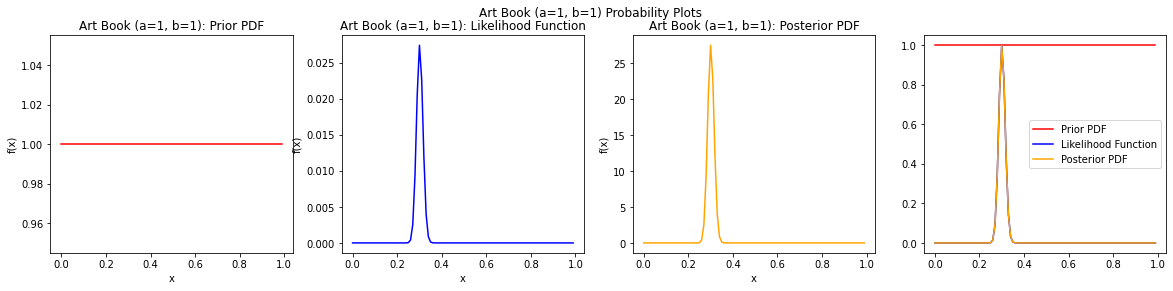

In [174]:
print("Probablity Distribution For Purchase of An Art Book: Uninformed Prior")

x = np.arange(0, 1, 0.01)
Prior, Likelihood, Posterior = posterior_from_conjugate_prior(
    Likelihood_Dist_Type='Binomial', 
    x=x, 
    n=1000, 
    k=cnt_purchasedA, 
    a=1, 
    b=1)

denominator = np.sum(Prior*Likelihood) * (x[1] - x[0])
post = Likelihood*Prior / denominator

printConfidenceInterval(post = post, dx = x[1] - x[0], lb=0.025, ub=0.975)
printProbPlots(x, Prior, Likelihood, post, "Art Book (a=1, b=1)")

Probablity Distribution For Purchase of A History Book: Uninformed Prior
a_prime = 544.
b_prime = 458.
The probaiblity is 0.95 that the value for p in the interval [0.52,0.58].


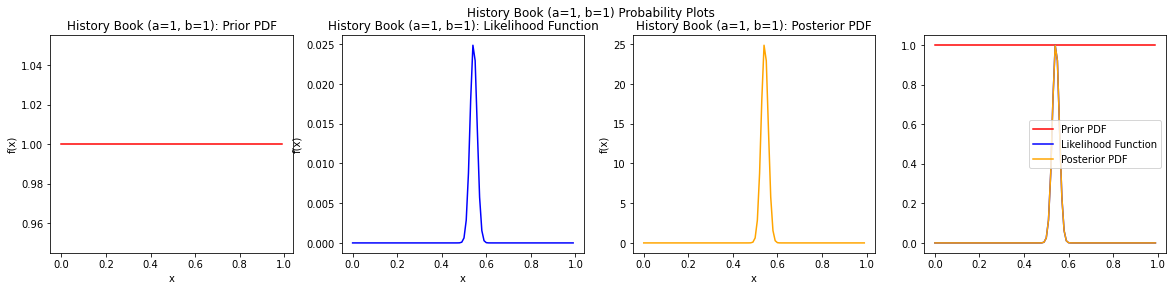

In [175]:
print("Probablity Distribution For Purchase of A History Book: Uninformed Prior")

x = np.arange(0, 1, 0.01)
Prior, Likelihood, Posterior = posterior_from_conjugate_prior(
    Likelihood_Dist_Type='Binomial', 
    x=x, 
    n=1000, 
    k=cnt_purchasedH, 
    a=1, 
    b=1)

denominator = np.sum(Prior*Likelihood*dx)
post = Likelihood*Prior / denominator
printConfidenceInterval(post = post, dx = x[1] - x[0], lb=0.025, ub=0.975)
printProbPlots(x, Prior, Likelihood, post, "History Book (a=1, b=1)")

Probablity Distribution For Purchase of A Table Book: Uninformed Prior
a_prime = 381.
b_prime = 621.
The probaiblity is 0.95 that the value for p in the interval [0.35,0.42].


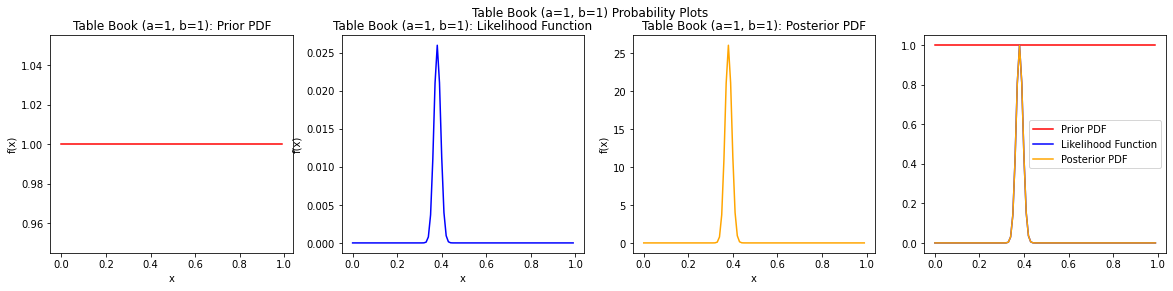

In [176]:
print("Probablity Distribution For Purchase of A Table Book: Uninformed Prior")

x = np.arange(0, 1, 0.01)
Prior, Likelihood, Posterior = posterior_from_conjugate_prior(
    Likelihood_Dist_Type='Binomial', 
    x=x, 
    n=1000, 
    k=cnt_purchasedT, 
    a=1, 
    b=1) 

denominator = np.sum(Prior*Likelihood*dx)
post = Likelihood*Prior / denominator
printConfidenceInterval(post = post, dx = x[1] - x[0], lb=0.025, ub=0.975)
printProbPlots(x, Prior, Likelihood, post, "Table Book (a=1, b=1)")

#### Question 5 (15 points)
The data set CHDdata.csv contains cases of coronary heart disease
(CHD) and variables associated with the patient’s condition: systolic blood pressure, yearly tobacco use (in kg), low density lipoprotein (ldl),
adiposity, family history (0 or 1), type A personality score (typea), obesity
(body mass index), alcohol use, age, and the diagnosis of CHD (0 or 1).


Perform a Bayesian analysis of these data that finds the posterior marginal
probability distributions for the means for the data of patients with and
without CHD. 

You should first standard scale (subtract the mean and
divide by the standard deviation) all the numeric variables (remove family
history and do not scale CHD). Then separate the data into two sets, one
for patients with CHD and one for patients without CHD.

Your priors for both groups should assume means of 0 for all variables
and a correlation of 0 between all pairs of variables. You should assume
all variances for the variables are 1. 

Use a prior alpha equal to one plus the number of predictor variables. 

Compute and compare the Bayesian estimates for the posterior means for each group.

**For 5 extra credit points**, compute the probability of observing a point at
least as extreme as the posterior mean of patients without coronary heart
disease under the posterior distribution for the patients with coronary
heart disease. 

Then compute the probability of observing a point at least
as extreme as the posterior mean of patients with coronary heart disease
under the posterior distribution for the patients without coronary heart
disease.

#### Answer:

In [23]:
X_cols = ['sbp','tobacco','ldl','adiposity','typea','obesity','alcohol','age']

df_Q5_X = pd.read_csv(r'C:\Users\dianam\Documents\Personal\BayesianML\Mod2\CHDdata.csv')[X_cols]
print(df_Q5_X.head())

df_Q5_y = pd.read_csv(r'C:\Users\dianam\Documents\Personal\BayesianML\Mod2\CHDdata.csv')[['chd']]
print(df_Q5_y.head())

   sbp  tobacco   ldl  adiposity  typea  obesity  alcohol  age
0  160    12.00  5.73      23.11     49    25.30    97.20   52
1  144     0.01  4.41      28.61     55    28.87     2.06   63
2  118     0.08  3.48      32.28     52    29.14     3.81   46
3  170     7.50  6.41      38.03     51    31.99    24.26   58
4  134    13.60  3.50      27.78     60    25.99    57.34   49
   chd
0    1
1    1
2    0
3    1
4    1


In [24]:
for key in df_Q5_X.keys()[0:8]:
    df_Q5_X[key] = df_Q5_X[key] - np.mean(df_Q5_X[key])
    df_Q5_X[key] = df_Q5_X[key] /df_Q5_X[key].std()

df_Q5_X.head()


,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age
0,1.057417,1.821099,0.477894,-0.295183,-0.418017,-0.176594,3.274189,0.628654
1,0.276789,-0.789382,-0.159507,0.411694,0.193134,0.670646,-0.612081,1.381617
2,-0.991731,-0.774141,-0.608585,0.883374,-0.112441,0.734723,-0.540597,0.217947
3,1.545310,0.841352,0.806252,1.622382,-0.214300,1.411091,0.294742,1.039361
4,-0.211103,2.169453,-0.598928,0.305020,0.702427,-0.012842,1.645991,0.423301


In [26]:
df_Scaled_X_y = df_Q5_X
df_Scaled_X_y['chd'] = df_Q5_y['chd']
cnt_records = df_Scaled_X_y.shape[0]
print('Count of records: {}'.format(cnt_records))
df_Scaled_X_y.head()

Count of records: 462


,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,chd
0,1.057417,1.821099,0.477894,-0.295183,-0.418017,-0.176594,3.274189,0.628654,1
1,0.276789,-0.789382,-0.159507,0.411694,0.193134,0.670646,-0.612081,1.381617,1
2,-0.991731,-0.774141,-0.608585,0.883374,-0.112441,0.734723,-0.540597,0.217947,0
3,1.545310,0.841352,0.806252,1.622382,-0.214300,1.411091,0.294742,1.039361,1
4,-0.211103,2.169453,-0.598928,0.305020,0.702427,-0.012842,1.645991,0.423301,1


**Split into chd and no chd**

In [27]:
df_Scaled_chd1 = df_Scaled_X_y.query('chd == 1')
cnt_chd1 = df_Scaled_chd1.shape[0]
print('Count of records with chd: {}'.format(cnt_chd1))

df_Scaled_chd0 = df_Scaled_X_y.query('chd == 0')
cnt_chd0 = df_Scaled_chd0.shape[0]
print('Count of records without chd: {}'.format(cnt_chd0))

Count of records with chd: 160
Count of records without chd: 302


For each columns I want to calculate the "posterior marginal
probability distributions for the means for the data of patients with and
without CHD."

In [105]:
df_Scaled_chd0.describe()

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,chd
count,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.0
mean,-0.139858,-0.217921,-0.191262,-0.184768,-0.075003,-0.072778,-0.045465,-0.271184,0.0
std,0.877472,0.786431,0.903199,0.998995,0.969453,0.970824,0.959907,1.018736,0.0
min,-1.821149,-0.791559,-1.815784,-2.399107,-4.084926,-1.968377,-0.696228,-1.904039,0.0
25%,-0.698996,-0.791559,-0.812602,-1.014913,-0.621734,-0.816771,-0.675395,-1.082625,0.0
50%,-0.308682,-0.566217,-0.367145,-0.100471,-0.061512,-0.112517,-0.449302,-0.192760,0.0
75%,0.276789,0.122871,0.264220,0.584879,0.600569,0.479602,0.219684,0.543090,0.0
max,3.692037,3.562871,5.113539,2.140331,2.434023,4.873623,5.238565,1.450068,0.0


In [106]:

df_Scaled_chd1.describe()

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,chd
count,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.0
mean,0.263982,0.411325,0.361007,0.348750,0.141569,0.137368,0.085816,0.511859,1.0
std,1.155206,1.211651,1.074443,0.907116,1.043708,1.042159,1.069443,0.728945,0.0
min,-1.772359,-0.791559,-1.540543,-2.058521,-3.371916,-2.692210,-0.696228,-1.767136,1.0
25%,-0.528233,-0.464977,-0.386461,-0.249879,-0.545340,-0.571736,-0.676825,-0.004519,1.0
50%,-0.015946,0.107631,0.156779,0.385347,0.193134,0.102259,-0.355965,0.697105,1.0
75%,0.984233,0.993757,0.889549,1.051418,0.804286,0.649287,0.307916,1.107812,1.0
max,3.887194,6.001351,4.548570,2.195596,2.535882,4.669526,5.316176,1.450068,1.0


In [145]:
p = 8 # 8 parameters
prior_variance = 1
prior_mean  = 0

# Get the parameters for the likelihood and prior distribution from the key word arguments.
x = np.arange(0, 1, 0.01)
n = 462 # This is the number of Bernoili trials.
k = 160 # This is the number of 'successes'.
a = 1 + p # This is the parameter alpha for the prior Beta distribution
b = prior_alpha * 2 # This is the parameter beta for the prior Beta distribution

print(f'a_prime = {k + a}.')
print(f'b_prime = {n - k + b}.')
Likelihood = binom.pmf(p=x, n=n, k=k)
Prior = beta.pdf(x=x, a=a, b=b)
Posterior = beta.pdf(x=x, a=k+a, b=n-k+b)


* plug means into binomial distribution - beta prior
* 

### Question 6 (10 points)

See PowerPoint - make up a value for the "red box"

### Question 7 (15 points) 

Using the Python Notebook <https://www.kaggle.com/billbasener/pt2-probabilities-likelihoods-and-bayes-theorem>, 
complete the challenge question from Section 6: Modify the code from Section 5 to and add the ability
to use the posterior from conjugate prior function to output the posterior probability parameters given parameters and for a Gaussian Likelihood with known variance σ2, and use your modified function to create the Prior, Likelihood, Posterior plots as in Section 5 of the notebook.


In [263]:
from scipy.stats import binom
from scipy.stats import beta
from scipy.stats import norm

def posterior_from_conjugate_prior(**kwargs):
    if kwargs['Likelihood_Dist_Type'] == 'Binomial':
        # Get the parameters for the likelihood and prior distribution from the key word arguments.
        x = kwargs['x'] # This is state space of possible values for p = 'probability of success' in [0,1]
        n = kwargs['n'] # This is the number of Bernoili trials.
        k = kwargs['k'] # This is the number of 'successes'.
        a = kwargs['a'] # This is the parameter alpha for the prior Beta distribution
        b = kwargs['b'] # This is the parameter beta for the prior Beta distribution
        
        print(f'a_prime = {k + a}.')
        print(f'b_prime = {n - k + b}.')
        Likelihood = binom.pmf(p=x, n=n, k=k)
        Prior = beta.pdf(x=x, a=a, b=b)
        Posterior = beta.pdf(x=x, a=k+a, b=n-k+b)
        
        return [Prior, Likelihood, Posterior]
    
    elif kwargs['Likelihood_Dist_Type'] == 'Gaussian_Known_Variance':
        # Get the parameters for the likelihood and prior distribution from the key word arguments.
        x = kwargs['x'] # This is state space of possible values for x in (-infinity,infinity)
        mu = kwargs['mu'] # This is the mean from the data
        var = kwargs['var'] # This is the variance from the data
        prior_mu = kwargs['prior_mu'] # This is the mean for the prior on mu
        prior_var = kwargs['prior_var'] # This is the variance for the prior on mu
        #print(kwargs)
        
        # To answer the challenge question, modify this section with the correct formulas
        # QUESTION IS n == x.size?????
        n = 1000

        xsum = x.sum()
        print(f'x sum = {xsum}.')

        var_prime = 1 / ((1/prior_var) + (n/var))

        mu_part1 = var_prime

        mu_part2a = prior_mu / prior_var
        mu_part2b = xsum / var
        mu_part2 = (mu_part2a + mu_part2b)

        mu_prime = mu_part1 * mu_part2 
        
        print(f'mu_prime = {mu_prime}.')
        print(f'var_prime = {var_prime}.')
        Likelihood = norm.pdf(x=x, loc=mu, scale=var)
        Prior = norm.pdf(x=x, loc=prior_mu, scale=prior_var)

        # QUESTION THIS POSTERIOR IS INCORRECT
        Posterior = norm.pdf(x=x, loc=mu_prime, scale=var_prime)
        
        return [Prior, Likelihood, Posterior]
    
    else:
        print('Distribution type not supported.') 
        return -1, -1, -1

In [265]:
x = np.arange(5, 100, 0.01)
Prior, Likelihood, Posterior = posterior_from_conjugate_prior(Likelihood_Dist_Type='Gaussian_Known_Variance', x=x, mu=50, var=21, prior_mu=40, prior_var=5)

x sum = 498702.4999999904.
mu_prime = 496.7840071698768.
var_prime = 0.02091216889065923.


C:\Users\dianam\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


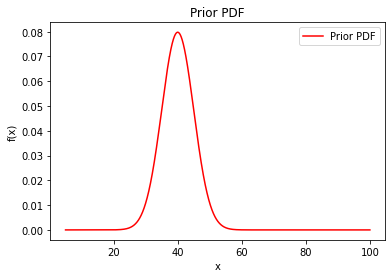

C:\Users\dianam\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


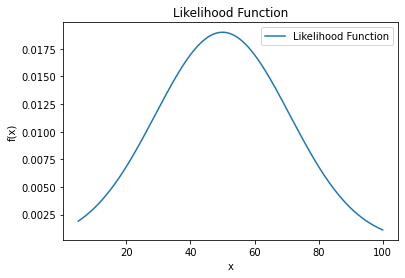

C:\Users\dianam\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


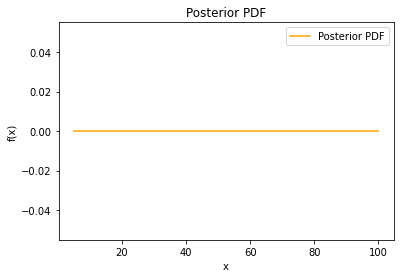

In [266]:
ax1 = sns.lineplot(x, Prior, color='red')
ax1.set(xlabel='x', ylabel='f(x)', title=f'Prior PDF');
plt.legend(labels=['Prior PDF']);
plt.show()

ax2 = sns.lineplot(x, Likelihood)
ax2.set(xlabel='x', ylabel='f(x)', title=f'Likelihood Function');
plt.legend(labels=['Likelihood Function']);
plt.show()

ax3 = sns.lineplot(x, Posterior, color='orange')
ax3.set(xlabel='x', ylabel='f(x)', title=f'Posterior PDF');
plt.legend(labels=['Posterior PDF']);
plt.show()